# 1. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
all_data = pd.concat([train, test])

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"train has {train.shape[0]} data.")
train.isnull().sum()

train has 891 data.


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(f"test has {test.shape[0]} data.")
test.isnull().sum()

test has 418 data.


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Fill missing values
Fare and Embarked have few missing values, so fill them by mean (or mode).

In [6]:
test['Fare'] = test['Fare'].fillna(all_data['Fare'].mean())
train['Embarked'] = train['Embarked'].fillna(all_data['Embarked'].mode()[0])

### Convert string values into numeric
**Sex**: Male, Female -> 0, 1  
**Embarked**: C, Q, S -> 0, 1, 2

In [7]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1}).astype(int)
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1}).astype(int)
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)

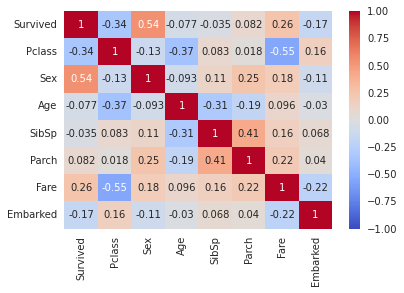

In [8]:
p = sns.heatmap(train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].corr(),\
                annot=True, cmap='coolwarm', vmin=-1)